In [1]:
import pandas as pd

# Especifique o caminho do arquivo Excel
caminho_do_arquivo = 'data/dataset.xlsx'

# Carregue a tabela em um DataFrame
dados = pd.read_excel(caminho_do_arquivo)

In [2]:
# - Visualizar as primeiras linhas do DataFrame
print(dados.head())

        Date  Product Pellets  DDRS Rejects/Feed  SDRS Rejects/Feed
0 2019-12-01       696.137593           0.113790           0.195691
1 2019-12-02       728.049589           0.139619           0.208134
2 2019-12-03       685.259547           0.108996           0.191460
3 2019-12-04       720.261113           0.109885           0.176185
4 2019-12-05       572.651645           0.118162           0.209689


In [3]:

# - Obter informações sobre os tipos de dados e valores ausentes
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               436 non-null    datetime64[ns]
 1   Product Pellets    436 non-null    float64       
 2   DDRS Rejects/Feed  436 non-null    float64       
 3   SDRS Rejects/Feed  436 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 13.8 KB
None


In [ ]:
# - Realizar operações de tratamento, por exemplo, remover linhas com valores ausentes
# dados_tratados = dados.dropna()

In [4]:
# - Executar análises específicas, por exemplo, calcular estatísticas descritivas
print(dados.describe())

       Product Pellets  DDRS Rejects/Feed  SDRS Rejects/Feed
count       436.000000         436.000000         436.000000
mean        698.412694           0.192702           0.168843
std          94.492253           0.111107           0.129603
min          -4.362016           0.102469           0.091280
25%         683.812003           0.162537           0.120863
50%         724.837222           0.180560           0.142688
75%         745.779653           0.207227           0.195775
max         823.875864           1.997508           2.269461


In [8]:
# mostrar o regsitro que possui o menor valor de 'Products Pellets'
print(dados[dados['Product Pellets'] == dados['Product Pellets'].min()])

          Date  Product Pellets  DDRS Rejects/Feed  SDRS Rejects/Feed
157 2020-05-06        -4.362016           1.997508           2.269461


In [11]:
correlation_matrix = dados.corr()
print(correlation_matrix)

                   Product Pellets  DDRS Rejects/Feed  SDRS Rejects/Feed
Product Pellets           1.000000          -0.325807          -0.357920
DDRS Rejects/Feed        -0.325807           1.000000           0.880393
SDRS Rejects/Feed        -0.357920           0.880393           1.000000


/tmp/ipykernel_24090/2140068662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados.corr()


In [12]:
!pip install seaborn

     |████████████████████████████████| 294 kB 4.1 MB/s eta 0:00:01


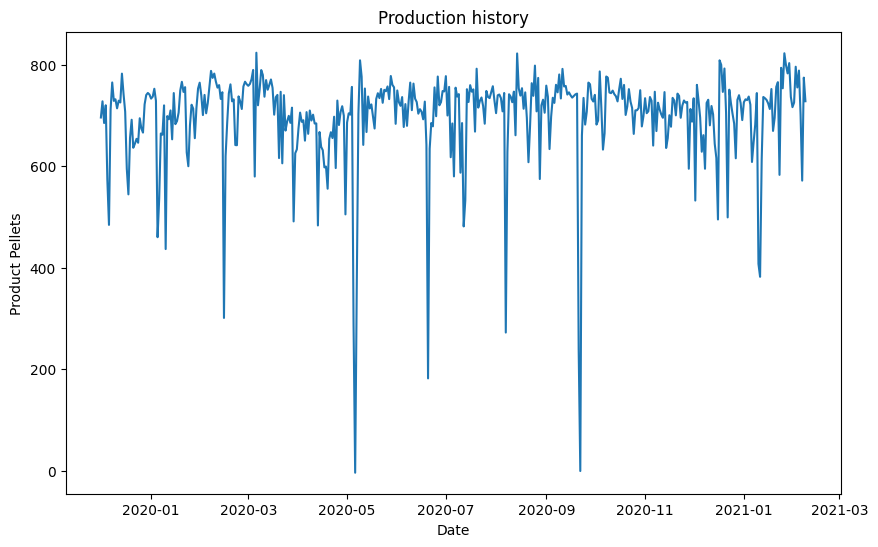

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de gráfico de linha para a coluna 'Pellets'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Product Pellets', data=dados)
plt.title('Production history')
plt.show()

In [49]:
!pip install plotly

     |████████████████████████████████| 15.6 MB 10.2 MB/s eta 0:00:01
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)


In [52]:
!pip install statsmodels

     |████████████████████████████████| 10.1 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 10.6 MB/s eta 0:00:01


In [57]:
import plotly.express as px
import pandas as pd
import numpy as np

# Função para remover outliers usando o método IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remover outliers das colunas relevantes
dados_filtered = remove_outliers(dados, 'Product Pellets')
dados_filtered = remove_outliers(dados_filtered, 'DDRS Rejects/Feed')
dados_filtered = remove_outliers(dados_filtered, 'SDRS Rejects/Feed')

# Extraindo as colunas relevantes do DataFrame filtrado
dates = dados_filtered['Date']
pellets = dados_filtered['Product Pellets']
ddrs_rejects = dados_filtered['DDRS Rejects/Feed']
sdrs_rejects = dados_filtered['SDRS Rejects/Feed']

# Criando DataFrame para Plotly
df_plotly = pd.DataFrame({'Date': dates, 'Pellets': pellets, 'DDRS Rejects': ddrs_rejects * 100, 'SDRS Rejects': sdrs_rejects * 100})

# Criando gráfico interativo com Plotly Express
fig = px.scatter(df_plotly, x='Pellets', y=['DDRS Rejects', 'SDRS Rejects'],
                 labels={'variable': 'Rejects/Feed', 'value': 'Percentage'},
                 title='Evolução de DDRS e SDRS em relação a Pellets (Sem Outliers)',
                 hover_data=['Date'], trendline='ols')

# Exibindo o gráfico interativo
fig.show()